## Programming Assignment 2: EE-5180


## Keshaw Choudhary EE21B069

# Non-Linear Regression: Neural Networks

2.1. Write program in python to compute the output of feed-forward network. Assume m1 = 30, m2 = 10
and m3 = 1. Initialize W(1), W(2), b(1) and b(2) suitably. For simplicity assume weights and bias are
non-negative. Hence compute the output at the output node for suitable input vector.

In [3]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

# Define the dimensions of the neural network
m1 = 30  # Input nodes
m2 = 10  # Hidden nodes
m3 = 1   # Output nodes

# Initialize weights and biases
np.random.seed(42)  # for reproducibility

W1 = np.random.rand(m2, m1)  # Weight matrix between input and hidden layer
W2 = np.random.rand(m3, m2)  # Weight matrix between hidden and output layer

b1 = np.random.rand(m2, 1)    # Bias for the hidden layer
b2 = np.random.rand(m3, 1)    # Bias for the output layer

# Define input vector
x = np.random.rand(m1, 1)  # Example input vector

# Compute output of the feed-forward network
def feed_forward(x, W1, W2, b1, b2):
    # Compute activations of hidden layer
    z1 = np.dot(W1, x) + b1
    a1 = relu(z1)
    
    # Compute output of the neural network
    z2 = np.dot(W2, a1) + b2
    output = z2
    
    return output

# Compute output
output = feed_forward(x, W1, W2, b1, b2)
print("Output of the neural network:", output)

Output of the neural network: [[39.65829525]]


2.2. Extend this code for output nodes m3 = 2.

In [32]:
# Define the dimensions of the neural network
m1 = 30  # Input nodes
m2 = 10  # Hidden nodes
m3 = 2   # Output nodes

# Initialize weights and biases
np.random.seed(42)  # for reproducibility

W1 = np.random.rand(m2, m1)  # Weight matrix between input and hidden layer
W2 = np.random.rand(m3, m2)  # Weight matrix between hidden and output layer

b1 = np.random.rand(m2, 1)    # Bias for the hidden layer
b2 = np.random.rand(m3, 1)    # Bias for the output layer

# # Define input vector
x = np.random.rand(m1, 1)  # Example input vector

# Compute output
output = feed_forward(x, W1, W2, b1, b2)
print("Output of the neural network:", output)

Output of the neural network: [[37.03943386]
 [27.60817471]]


2.3 Write a back-propagation algorithm for output m3 = 1. Write a a gradient computation for weights of
layer 2, w(2)jk and update rule for weight, Similar to layer 1 and update rule for w(1)ij . Similarly write a
update rule for bias.

In [38]:
import numpy as np

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Define the dimensions of the neural network
m1 = 30  # Input nodes
m2 = 10  # Hidden nodes
m3 = 1   # Output nodes

In [39]:
# Initialize weights and biases
np.random.seed(42)  # for reproducibility

W1 = np.random.rand(m2, m1)  # Weight matrix between input and hidden layer
W2 = np.random.rand(m3, m2)  # Weight matrix between hidden and output layer

b1 = np.random.rand(m2, 1)    # Bias for the hidden layer
b2 = np.random.rand(m3, 1)    # Bias for the output layer

# Define input vector and target output
x = np.random.rand(m1, 1)  # Example input vector
y_true = np.random.rand(m3, 1)  # Example target output

# Learning rate
learning_rate = 0.01

# Forward propagation
def forward_propagation(x, W1, W2, b1, b2):
    # Compute activations of hidden layer
    z1 = np.dot(W1, x) + b1
    a1 = relu(z1)
    
    # Compute output of the neural network
    z2 = np.dot(W2, a1) + b2
    output = z2
    
    return a1, output

# Backpropagation
def back_propagation(x, y_true, W1, W2, b1, b2, learning_rate):
    a1, y_pred = forward_propagation(x, W1, W2, b1, b2)
    
    # Compute error
    error = y_pred - y_true
    
    # Compute gradients for weights and biases
    delta2 = error
    dW2 = np.dot(delta2, a1.T)
    db2 = delta2
    
    delta1 = np.dot(W2.T, delta2) * relu_derivative(a1)
    dW1 = np.dot(delta1, x.T)
    db1 = delta1
    
    # Update weights and biases
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    
    return W1, W2, b1, b2

# Perform one iteration of training
W1, W2, b1, b2 = back_propagation(x, y_true, W1, W2, b1, b2, learning_rate)

# Print updated weights and biases
print("Updated W1:", W1)
print("Updated W2:", W2)
print("Updated b1:", b1)
print("Updated b2:", b2)

Updated W1: [[ 0.36021001  0.93747508  0.7263803   0.57951015  0.14122127  0.14487781
   0.04581651  0.85776172  0.59614715  0.7009341   0.00538707  0.96962121
   0.83011498  0.2114166   0.18100821  0.16624958  0.29013148  0.51524761
   0.42998311  0.28137055  0.60235816  0.13602057  0.28344443  0.35837045
   0.44372007  0.77244015  0.19876528  0.50672217  0.57986392  0.0363608 ]
 [ 0.4602129   0.0344078   0.00733617  0.75201601  0.813496    0.6941033
   0.17849213  0.01116099  0.63315704  0.36675976 -0.03421083  0.49220933
   0.01045722  0.8998358   0.25038271  0.48614754  0.16663428  0.42230514
   0.5265393   0.08349546  0.8719665   0.73942289  0.8500495   0.81266556
   0.47092697  0.79093368  0.07915194  0.11874704 -0.0838095   0.22159612]
 [ 0.23877208  0.13285534  0.77001404  0.15644533  0.12614131  0.4264058
   0.01259978  0.71417488  0.02258258  0.91221235  0.6132667   0.19569627
  -0.01882716  0.80581117  0.69831341  0.54955191  0.62365968 -0.02542573
   0.33794245  0.01273976 

2.4. Combine feed-forward network and back-propagation algorithm, write algorithm similar to gradient descent

In [41]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def mean_squared_error(y_pred, y_true):
    return 0.5 * np.mean((y_pred - y_true) ** 2)

# Define the dimensions of the neural network
m1 = 30  # Input nodes
m2 = 10  # Hidden nodes
m3 = 1   # Output nodes

# Initialize weights and biases
np.random.seed(42)  # for reproducibility
W1 = np.random.rand(m2, m1)  # Weight matrix between input and hidden layer
W2 = np.random.rand(m3, m2)  # Weight matrix between hidden and output layer
b1 = np.random.rand(m2, 1)    # Bias for the hidden layer
b2 = np.random.rand(m3, 1)    # Bias for the output layer

# Define training data
X_train = np.random.rand(100, m1)  # Example input vectors
y_train = np.random.rand(100, m3)  # Example target vectors

# Hyperparameters
learning_rate = 0.01
iterations = 1000

# Gradient Descent
for iteration in range(iterations):
    total_loss = 0
    
    for i in range(len(X_train)):
        x = X_train[i].reshape(-1, 1)
        y_true = y_train[i].reshape(-1, 1)
        
        # Forward pass
        z1 = np.dot(W1, x) + b1
        a1 = relu(z1)
        z2 = np.dot(W2, a1) + b2
        y_pred = z2
        
        # Compute loss
        loss = mean_squared_error(y_pred, y_true)
        total_loss += loss
        
        # Backpropagation
        delta2 = y_pred - y_true
        delta1 = np.dot(W2.T, delta2) * relu_derivative(z1)
        
        dW2 = np.dot(delta2, a1.T)
        db2 = delta2
        dW1 = np.dot(delta1, x.T)
        db1 = delta1
        
        # Update weights and biases
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
    
    # Compute average loss for the iteration
    avg_loss = total_loss / len(X_train)
    
    # Print progress
    if iteration % 100 == 0:
        print(f"Iterations {iteration}: Average Loss = {avg_loss}")

Iterations 0: Average Loss = 89.53450891483011
Iterations 100: Average Loss = 0.04282417728098627
Iterations 200: Average Loss = 0.04282417728098627
Iterations 300: Average Loss = 0.04282417728098627
Iterations 400: Average Loss = 0.04282417728098627
Iterations 500: Average Loss = 0.04282417728098627
Iterations 600: Average Loss = 0.04282417728098627
Iterations 700: Average Loss = 0.04282417728098627
Iterations 800: Average Loss = 0.04282417728098627
Iterations 900: Average Loss = 0.04282417728098627


2.5. In each iteration, step one :there is feed forward computation. Step two: backpropagation and update of weights and biases. Write a program for optimization of weights similar to gradient descent and compute the cost function as function of iteration.

Iteration 0: Average Loss = 89.53450891483011
Iteration 100: Average Loss = 0.04282417728098627
Iteration 200: Average Loss = 0.04282417728098627
Iteration 300: Average Loss = 0.04282417728098627
Iteration 400: Average Loss = 0.04282417728098627
Iteration 500: Average Loss = 0.04282417728098627
Iteration 600: Average Loss = 0.04282417728098627
Iteration 700: Average Loss = 0.04282417728098627
Iteration 800: Average Loss = 0.04282417728098627
Iteration 900: Average Loss = 0.04282417728098627
Training finished.


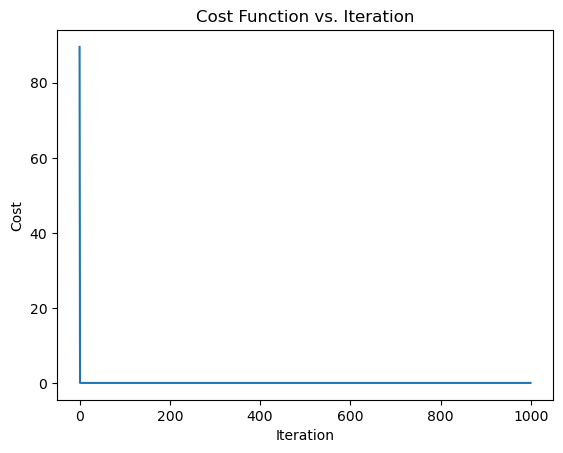

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def mean_squared_error(y_pred, y_true):
    return 0.5 * np.mean((y_pred - y_true) ** 2)

# Define the dimensions of the neural network
m1 = 30  # Input nodes
m2 = 10  # Hidden nodes
m3 = 1   # Output nodes

# Initialize weights and biases
np.random.seed(42)  # for reproducibility
W1 = np.random.rand(m2, m1)  # Weight matrix between input and hidden layer
W2 = np.random.rand(m3, m2)  # Weight matrix between hidden and output layer
b1 = np.random.rand(m2, 1)    # Bias for the hidden layer
b2 = np.random.rand(m3, 1)    # Bias for the output layer

# Define training data
X_train = np.random.rand(100, m1)  # Example input vectors
y_train = np.random.rand(100, m3)  # Example target vectors

# Hyperparameters
learning_rate = 0.01
iterations = 1000

# Optimization
cost_history = []

for iteration in range(iterations):
    total_loss = 0
    
    for i in range(len(X_train)):
        x = X_train[i].reshape(-1, 1)
        y_true = y_train[i].reshape(-1, 1)
        
        # Forward pass
        z1 = np.dot(W1, x) + b1
        a1 = relu(z1)
        z2 = np.dot(W2, a1) + b2
        y_pred = z2
        
        # Compute loss
        loss = mean_squared_error(y_pred, y_true)
        total_loss += loss
        
        # Backpropagation
        delta2 = y_pred - y_true
        delta1 = np.dot(W2.T, delta2) * relu_derivative(z1)
        
        dW2 = np.dot(delta2, a1.T)
        db2 = delta2
        dW1 = np.dot(delta1, x.T)
        db1 = delta1
        
        # Update weights and biases
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
    
    # Compute average loss for the iteration
    avg_loss = total_loss / len(X_train)
    cost_history.append(avg_loss)
    
    # Print progress
    if iteration % 100 == 0:
        print(f"Iteration {iteration}: Average Loss = {avg_loss}")

print("Training finished.")

# Plot cost function as a function of iteration
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iteration')
plt.show()

# Support vector Machines (SVM)

1. Write a program of SVM for binary classification.
Note: You can use library functions from python on svm.
You are allowed to take help of ChatGPT for programming.
Define input data suitably, and plot cost function as function of iteration and show the output of classification with supporting hyperplane

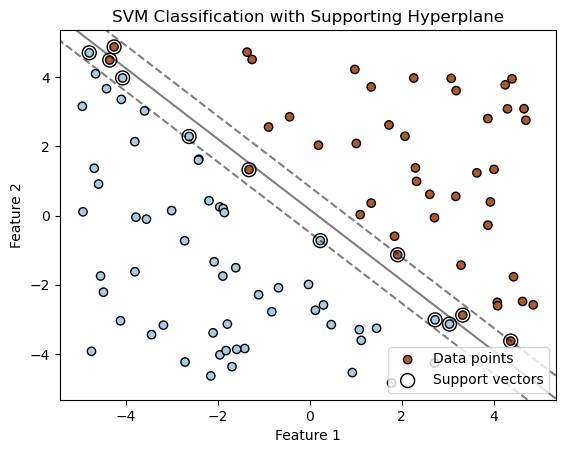

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate synthetic data for binary classification
np.random.seed(42)
X = np.random.rand(100, 2) * 10 - 5  # 100 points in the range [-5, 5] for each dimension
y = np.sign(X[:, 0] + X[:, 1])        # Classify points based on the sign of the sum of their coordinates

# Train Support Vector Machine classifier
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k', label='Data points')

# Plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support vectors')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification with Supporting Hyperplane')
plt.show()